

Specifics: It is straightforward to calculate player speed and acceleration metrics using player tracking data. Beyond “fastest speed,” it is less obvious how these metrics can be useful for teams. This theme challenges you to: 

-Identify players who are most effective at using speed on the field.
*Find Top End Speed, Average Speed, Top End Acceleration, Average Acceleration for each offensive skill position/ DB
-Identify how players maintain speed throughout a game.
*Speed vs route run (9 route tree)
*Average speed per route run as game progresses

-Consider what effective speed means for each position. Consider when (in a play, in a game) having speed is most imperative to successful play.
*HYPO: Speed most important on go routes

-Consider external factors to player speed, including game conditions/surface, weather, opponent, as well as within-game factors, including previous player work-load, opponent, play type, play direction, etc.


In [1]:
import pandas as pd
import numpy as np
import glob
def displayNameFix(name):
    split = name.split(' ')
    return split[0][0] + '. ' + split[1]



path =r'C:\Users\udirab\Documents\NFL-Data\Data\\'
allFiles = glob.glob(path + "tracking*")
list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

csv = pd.concat(list_, axis = 0, ignore_index = True)
#csv['displayNameAbbr'] = csv['displayName'].apply(lambda x: displayNameFix(x))

In [2]:
players =  pd.read_csv("C:\Users\udirab\Documents\NFL-Data\Data\players.csv")
games =  pd.read_csv("C:\Users\udirab\Documents\NFL-Data\Data\games.csv")
plays = pd.read_csv("C:\Users\udirab\Documents\NFL-Data\Data\plays.csv")

dbs = players[players['PositionAbbr'].isin(['CB', 'SS', 'FS', 'DB'])]
lbs = players[players['PositionAbbr'].isin(['ILB', 'MLB', 'LB', 'OLB'])]
off_skill = players[players['PositionAbbr'].isin(['TE', 'WR', 'RB', 'FB'])]
los = players[players['PositionAbbr'] == 'C']
qbs = players[players['PositionAbbr'] == 'QB']

In [187]:
def play_subset(playId):
    pass_forward= csv[csv['gameId'] == 2017090700][csv['playId'] == playId][csv['event'] == 'pass_forward'].time.iloc[0]
    pass_arrived = csv[csv['gameId'] == 2017090700][csv['playId'] == playId][csv['event'] == 'pass_arrived'].time.iloc[0]
    o_subset  = csv[csv['gameId'] == 2017090700][csv['playId'] == playId][csv['nflId'].isin(off_skill['nflId'])][csv['time'] < pass_arrived]
    qb_subset = csv[csv['gameId'] == 2017090700][csv['playId'] == playId][csv['nflId'].isin(qbs['nflId'])][csv['time'] < pass_forward]
    db_subset  = csv[csv['gameId'] == 2017090700][csv['playId'] == playId][csv['nflId'].isin(dbs['nflId'])][csv['time'] < pass_forward]
    lb_subset  = csv[csv['gameId'] == 2017090700][csv['playId'] == playId][csv['nflId'].isin(lbs['nflId'])][csv['time'] < pass_forward]
    los = csv[csv['gameId'] == 2017090700][csv['playId'] == playId][csv['displayName'] == 'football'][csv['time'] < pass_forward]
    return [pass_forward, pass_arrived, o_subset, qb_subset, db_subset, lb_subset, los]

In [145]:
for i, x in o_subset.groupby('displayName'):
    x1 = x.drop_duplicates(subset = 'time')
    x1['Acceleration'] = x1['s'].shift(-1) - x1['s'] 
    print(x1)
    break

                        time      x      y     s   dis     dir event  \
170279  2017-09-08T02:43:43Z  87.29  13.88  0.01  0.00  114.55   NaN   
170285  2017-09-08T02:43:44Z  87.29  13.88  0.01  0.00   92.37   NaN   
170295  2017-09-08T02:43:45Z  87.30  13.88  1.32  0.00  313.54   NaN   
170305  2017-09-08T02:43:46Z  85.26  15.92  4.41  0.50  330.28   NaN   
170315  2017-09-08T02:43:47Z  83.26  21.46  6.58  0.69  351.26   NaN   
170325  2017-09-08T02:43:48Z  83.21  28.73  6.49  0.71    0.32   NaN   
170335  2017-09-08T02:43:49Z  83.23  34.25  3.92  0.38  355.95   NaN   

            nflId    displayName  jerseyNumber  team  frame.id      gameId  \
170279  2550272.0  Albert Wilson          12.0  away         1  2017090700   
170285  2550272.0  Albert Wilson          12.0  away         7  2017090700   
170295  2550272.0  Albert Wilson          12.0  away        17  2017090700   
170305  2550272.0  Albert Wilson          12.0  away        27  2017090700   
170315  2550272.0  Albert Wilson 

C:\Users\user.user-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def distance(sub_df):
    begin = subset.iloc[0]
    end = subset.iloc[-1]
    return np.sqrt((end.x-begin.x)**2 + (end.y-begin.y)**2)

#Speed in yards/sec
def avg_speed(sub_df)
    return sub_df.s.mean()

def accel(sub_df)

def route_run()

In [ ]:
pass_plays = []
for i, x in plays.iterrows():
    if('pass' in x.playDescription):
        pass_plays.append([x.gameId, x.playId])

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings(action='once')


    
n = 0
tagging = []
for gameId, playId in pass_plays:
    try:
        pass_forward = csv[csv['gameId'] == gameId][csv['playId'] == playId][csv['event'] == 'pass_forward'].time.iloc[0]
        o_subset  = csv[csv['gameId'] == gameId][csv['playId'] == playId][csv['nflId'].isin(off_skill['nflId'])][csv['time'] < pass_forward]
        qb_pos  = csv[csv['gameId'] == gameId][csv['playId'] == playId][csv['nflId'].isin(qbs['nflId'])][csv['time'] < pass_forward]
        los = csv[csv['gameId'] == gameId][csv['playId'] == playId][csv['displayName'] == 'football'][csv['time'] < pass_forward]

        los_x = los[los['frame.id'] == 1].x.values[0]
        los_y = range(0,54)
        
        f, (a0, a1) = plt.subplots(1,2, gridspec_kw = {'height_ratios':[3, 1]})
        
        o_subset['Tm'] = range(0,len(o_subset))
        a0.scatter(o_subset.x, o_subset.y, c=o_subset.Tm, cmap='viridis', s = 1)
        a0.plot([los_x]*len(los_y), los_y, color = 'blue')
        a0.scatter(qb_pos.x, qb_pos.y, color = 'orange')
        a0.set_xlim([0,120])
        a0.set_ylim([0, 53.3])

        for i in range(0,110, 10):
            a0.plot([i]*53, range(0,53,1), color = 'black')

        for i, x in o_subset.groupby('displayName'):

            fac = 1
            if(qb_pos.y.iloc[0] > x.y.iloc[0]):
                fac = -1

            a1.scatter(x.x, x.y, c=o_subset.Tm, cmap='viridis', s = 1)
            a1.scatter(qb_pos.x, qb_pos.y)
            plt.title(str(n) + ' GameId: ' + str(x.gameId.iloc[0]) + ' PlayId: ' +  str(x.playId.iloc[0]) + 
                      '\nPlayerName + ID: ' + str(i) + ' ' + str(x.nflId.iloc[0]))
            print('b')
            plt.tight_layout()
            plt.show()
            #fname = r"C:/Users/udirab/Documents/NFL-Data/Classification/" + str(n) + ".png"
            #plt.savefig(fname, bbox_inches='tight')
            #plt.gcf().clear()
            break
            tagging.append([str(x.gameId.iloc[0]) ,str(x.playId.iloc[0]) ,str(n), str(x.nflId.iloc[0]), ''])
            n+=1
        break
    except Exception as e:
        pass
#cols = ['GameId', 'PlayId', 'PlayerName', 'ID', 'tag']
#pd.DataFrame(tagging, columns = cols).to_csv(r'C:/Users/udirab/Documents/NFL-Data/Classification/classification.csv')

C:\Users\udirab\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [ ]:
print(csv.head())

C:\Users\udirab\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


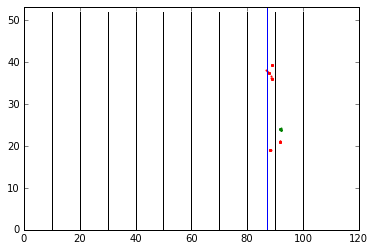

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
playId = 73
gameId = 2017091004
pass_forward= csv[csv['gameId'] == gameId][csv['playId'] == playId][csv['event'] == 'pass_forward'].time.iloc[0]
#pass_arrived = csv[csv['gameId'] == gameId][csv['playId'] == playId][csv['event'] == 'pass_arrived'].time.iloc[0]
o_subset  = csv[csv['gameId'] == gameId][csv['playId'] == playId][csv['nflId'].isin(off_skill['nflId'])][csv['time'] < pass_forward]
qb_subset = csv[csv['gameId'] == gameId][csv['playId'] == playId][csv['nflId'].isin(qbs['nflId'])][csv['time'] < pass_forward]
db_subset  = csv[csv['gameId'] == gameId][csv['playId'] == playId][csv['nflId'].isin(dbs['nflId'])][csv['time'] < pass_forward]
lb_subset  = csv[csv['gameId'] == gameId][csv['playId'] == playId][csv['nflId'].isin(lbs['nflId'])][csv['time'] < pass_forward]
los = csv[csv['gameId'] == gameId][csv['playId'] == playId][csv['displayName'] == 'football'][csv['time'] < pass_forward]

los_x = los[los['frame.id'] == 1].x.values[0]
los_y = range(0,54)


plt.scatter(o_subset.x, o_subset.y, color = 'red', s = 1)
plt.scatter(qb_subset.x, qb_subset.y, color = 'green', s = 1)
#plt.scatter(d_subset.x, d_subset.y, color = 'blue', s = 5)
#plt.scatter(lb_subset.x, lb_subset.y, color = 'green')
plt.plot([los_x]*len(los_y), los_y, color = 'blue')
for i in range(0,110, 10):
    plt.plot([i]*53, range(0,53,1), color = 'black')
plt.xlim(0, 120)
plt.ylim(0, 53.3)
plt.show()

In [35]:
plays[plays['gameId'] == gameId][plays['playId'] == playId].playDescription.iloc[0]


C:\Users\udirab\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


'(8:28) (No Huddle) C.Palmer pass short right to J.Brown to DET 32 for no gain (D.Slay).'

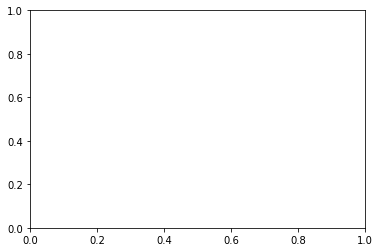

<Figure size 432x288 with 0 Axes>

In [202]:
import matplotlib.pyplot as plt
import matplotlib.animation as anim

fig = plt.figure()

x=[20,23,25,27,29,31]
y=[10,12,14,16,17,19]
t=[2,9,1,4,3,9]

#create index list for frames, i.e. how many cycles each frame will be displayed
frame_t = []
for i, item in enumerate(t):
    frame_t.extend([i] * item)

def init():
    fig.clear()

#animation function
def animate(i): 
    #prevent autoscaling of figure
    plt.xlim(15, 35)
    plt.ylim( 5, 25)
    #set new point
    plt.scatter(x[i], y[i], c = "b")

#animate scatter plot
ani = anim.FuncAnimation(fig, animate, init_func = init, 
                         frames = frame_t, interval = 100, repeat = True)
plt.show()

In [154]:
x_train = np.random.random((100, 100, 100, 3))

In [156]:
data_dim = 16
timesteps = 8
num_classes = 10

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))

In [158]:
x_train[0]

array([[0.80051329, 0.02571727, 0.14219863, 0.28177066, 0.00661955,
        0.98167259, 0.0944362 , 0.33290639, 0.87748944, 0.86850823,
        0.87886567, 0.54622169, 0.82974665, 0.84790593, 0.86349272,
        0.54845553],
       [0.56419187, 0.55708708, 0.84328071, 0.63650025, 0.54324682,
        0.52204757, 0.9369867 , 0.9198263 , 0.38810399, 0.07686799,
        0.137612  , 0.89980611, 0.08571438, 0.2880288 , 0.33269349,
        0.41104573],
       [0.08512885, 0.61350209, 0.58419608, 0.13091017, 0.23858591,
        0.83656949, 0.10703773, 0.61762091, 0.68145569, 0.83665685,
        0.54530578, 0.26784485, 0.61863639, 0.72357497, 0.17004471,
        0.7060275 ],
       [0.64554133, 0.86603908, 0.75877492, 0.67517387, 0.86466606,
        0.71350063, 0.61921496, 0.37328388, 0.84484796, 0.76046909,
        0.52760889, 0.81784476, 0.0070059 , 0.09432457, 0.96650115,
        0.70933291],
       [0.44276066, 0.12583272, 0.93027134, 0.30874859, 0.46332056,
        0.99154441, 0.14250859, 